In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # alias
from sklearn.preprocessing import StandardScaler
from matplotlib.pylab import rcParams
rcParams['figure.figsize']= 15,6

In [2]:
data=pd.read_csv("D:\Personel\DataScience\Dataset\AirPassengers.csv")
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
data.dtypes

Month          object
#Passengers     int64
dtype: object

In [93]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data=pd.read_csv("D:\Personel\DataScience\Dataset\AirPassengers.csv", parse_dates=['Month'], index_col='Month', date_parser=dateparse)

In [6]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [9]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [10]:
ts=data['#Passengers'] #time series data
ts.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [13]:
ts[:'1952-05'] # we can get specific data by specifying end index

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
1951-01-01    145
1951-02-01    150
1951-03-01    178
1951-04-01    163
1951-05-01    172
1951-06-01    178
1951-07-01    199
1951-08-01    199
1951-09-01    184
1951-10-01    162
1951-11-01    146
1951-12-01    166
1952-01-01    171
1952-02-01    180
1952-03-01    193
1952-04-01    181
1952-05-01    183
Name: #Passengers, dtype: int64

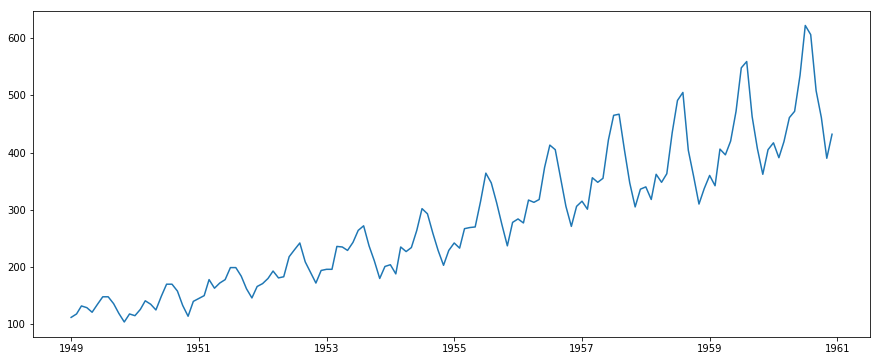

In [94]:
plt.plot(ts)

In [16]:
from statsmodels.tsa.stattools import adfuller

In [25]:
#ADF test to check whether the time series is stationaly
# Null hypothesis is ts is not stationary.
# if pvalue (2nd vaue i.e. 0.99) is less than 0.05, we should reject null hypothesis and say that ts is stationary
# but here the ts is not stationary, so pvalue is high
adfuller(ts, autolag='AIC')

(0.8153688792060423,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6929308390189)

In [26]:
adfuller?

In [18]:
# Since the above values do not have clear description, 
# a seperate function is written to print the details about the first 4 values written from adftest

def test_stationarity(timeseries):
    adftest = adfuller(timeseries, autolag='AIC')
    adfoutput = pd.Series(adftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations used'])
    for key,value in adftest[4].items():
        adfoutput[key]=value
    print(adfoutput)

In [19]:
test_stationarity(ts)

Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations used    130.000000
1%                              -3.481682
5%                              -2.884042
10%                             -2.578770
dtype: float64


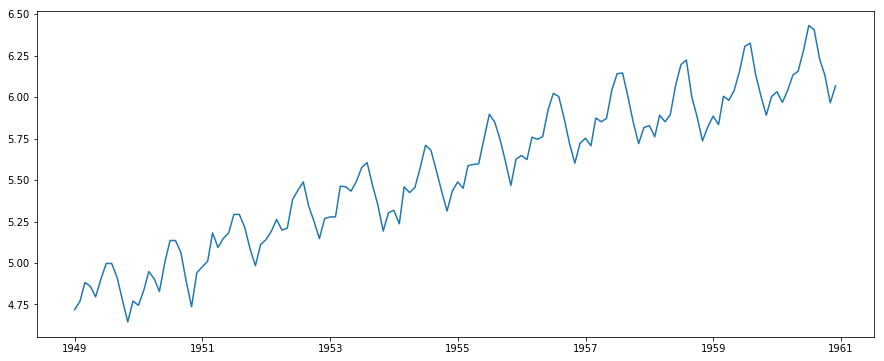

In [95]:
#Need to make ts stationary
#1st step is to eliminate the trend
#one of the tricks to reduce the trend is log transformation
ts_log = np.log(ts)
plt.plot(ts_log)

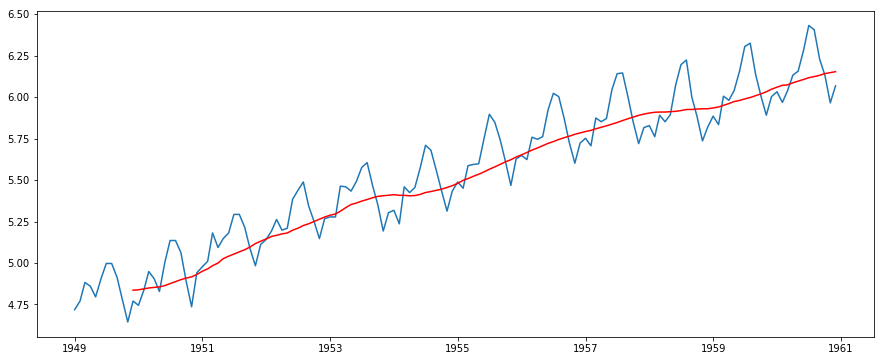

In [96]:
# 2ns step is to caluclate weighted avaerages, to know the trend value
# below line in red color is trend
weighted_avgs= ts_log.rolling(window=12).mean()
plt.plot(ts_log)
plt.plot(weighted_avgs, color='red')

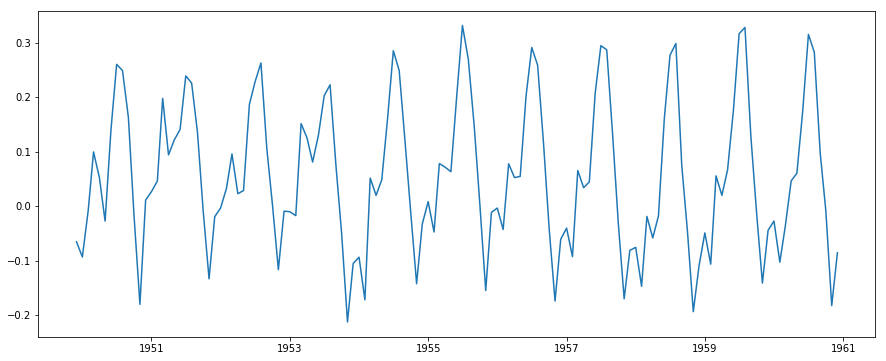

In [97]:
# step 3: Remove the trend from time series
# below is the plot of dtrended time series
detrended_ts= ts_log -weighted_avgs
plt.plot(detrended_ts)

In [98]:
# de-trended data has Nan values, which need to be dropped
detrended_ts.dropna(inplace=True)

In [99]:
#perform sdf test again on de-trended data
adfuller(detrended_ts,autolag='AIC')

(-3.162907991300858,
 0.022234630001243844,
 13,
 119,
 {'1%': -3.4865346059036564,
  '5%': -2.8861509858476264,
  '10%': -2.579896092790057},
 -436.63269481747125)


# Since the pvalue is less the 0.05 , we can reject the null hypothesis
# and say that the ts is stationary
# but the disadvantage of above moving avgs method is , 
# time-period is structly defined and equal priority is given to all time lines

#exponential smoothing - to give high weightage to recent timeperiods
# need to find out the latest package details for exp smoothing

# Eliminating Trend and Seasonality
# The simple trend reduction techniques discussed before don’t work in all cases, particularly the ones with high seasonality. 

Lets discuss two ways of removing trend and seasonality:

#Differencing – taking the differece with a particular time lag
#Decomposition – modeling both trend and seasonality and removing them from the model.


# Differencing

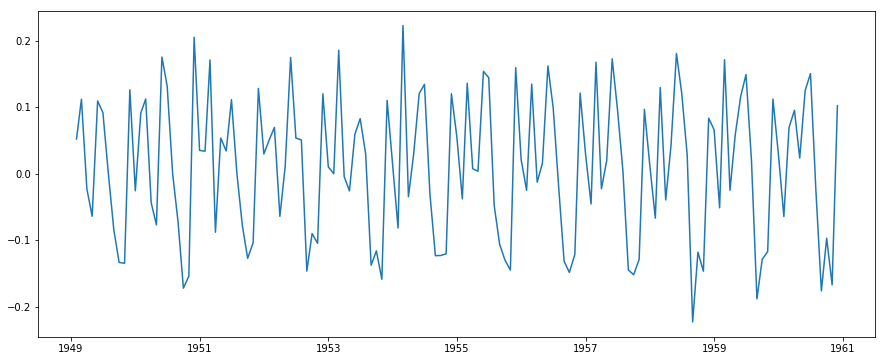

In [100]:
#1st order Differencing i.e. (y1-y0), (y2-y1), (y3-y2)...
ts_diff = ts_log - ts_log.shift()
plt.plot(ts_diff)

In [101]:
#verify the stationarity using adf test
ts_diff.dropna(inplace=True)
adfuller(ts_diff,autolag='AIC')
#since the pvalue is not too less, we can try for 2nd order differencing

(-2.717130598388145,
 0.0711205481508568,
 14,
 128,
 {'1%': -3.4825006939887997,
  '5%': -2.884397984161377,
  '10%': -2.578960197753906},
 -440.35846985568105)

# Decomposing

In [102]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [103]:
decomp = seasonal_decompose(ts_log)

In [104]:
trend=decomp.trend
season = decomp.seasonal
residual= decomp.resid

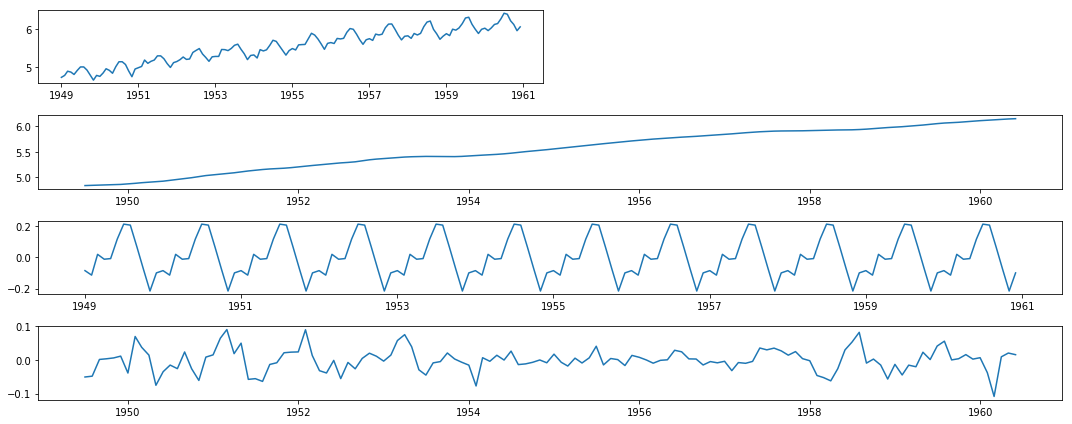

In [108]:
plt.subplot(411)
plt.plot(ts_log,label='original')

plt.subplot(412)
plt.plot(trend, label='trend')

plt.subplot(413)
plt.plot(season, label='seasonality')

plt.subplot(414)
plt.plot(residual, label='residual')

plt.tight_layout()

# Forecasting a time series- ARIMA

In [56]:
from statsmodels.tsa.stattools import acf, pacf

In [58]:
lag_acf = acf(detrended_ts, nlags=20)
lag_pacf = pacf(detrended_ts, nlags=20, method='ols')

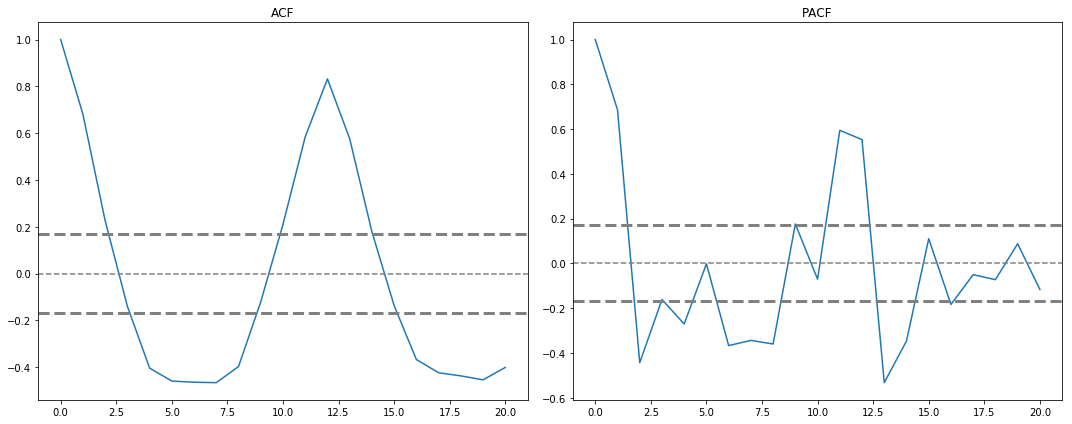

In [67]:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(detrended_ts)), linestyle='--', linewidth=3, color='gray')
plt.axhline(y=1.96/np.sqrt(len(detrended_ts)), linestyle='--', linewidth=3, color='gray')
plt.title('ACF')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(detrended_ts)), linestyle='--',linewidth=3, color='gray')
plt.axhline(y=1.96/np.sqrt(len(detrended_ts)), linestyle='--', linewidth=3, color='gray')
plt.title('PACF')
plt.tight_layout()

#p –lag value where PACF chart crosses upper confidence interval for the first time
#q - lag value where ACF plot crosses upper confidence interval for first time#

In [68]:
# ARIMA model with (p,d,q ) values
from statsmodels.tsa.arima_model import ARIMA

C:\Users\neelredd.ORADEV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


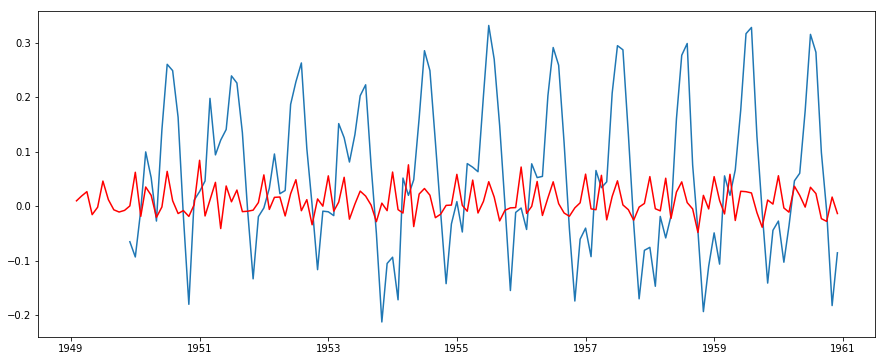

In [70]:
# since p and q values are 2, either of them should be considered for one model build
model=ARIMA(ts_log, order=(2,1,0))
ARout=model.fit(disp=-1)
plt.plot(detrended_ts)
plt.plot(ARout.fittedvalues, color='red')

C:\Users\neelredd.ORADEV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


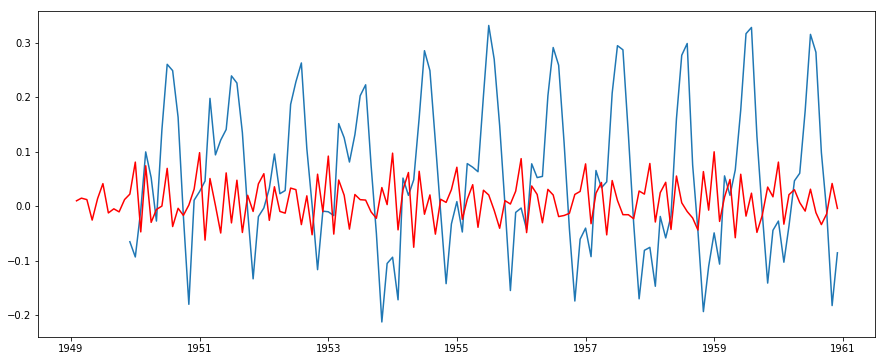

In [73]:
model2=ARIMA(ts_log, order=(0,1,2))
MAout =model2.fit(disp=-1)
plt.plot(detrended_ts)
plt.plot(MAout.fittedvalues, color='red')

C:\Users\neelredd.ORADEV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


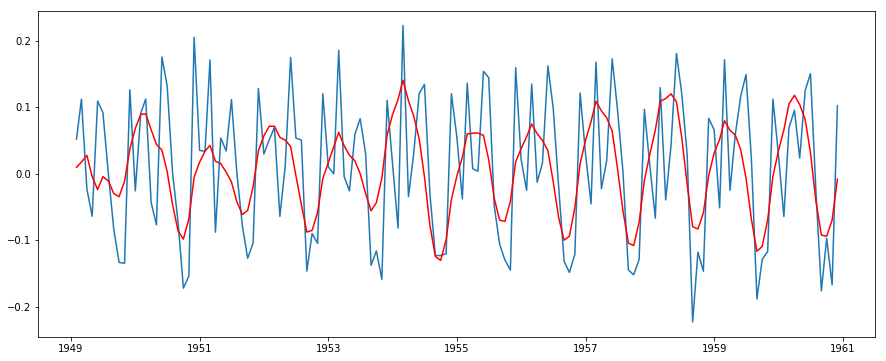

In [85]:
#Combined AR + MA model
model3=ARIMA(ts_log, order=(2,1,2,))
arimaout = model3.fit(disp=-1)
plt.plot(ts_diff)
plt.plot(arimaout.fittedvalues, color='red')

In [86]:
#RMSE between arima and order differencing is 1
sum((arimaout.fittedvalues-ts_diff)**2)


1.029151993746737

In [ ]:
# combined ARIMA model gave best result, 
# lets scale it back to the original values and see how well it performs there

In [87]:
#First step would be to store the predicted results as a separate series and observe it
pred_arima = pd.Series(arimaout.fittedvalues, copy=True)
pred_arima.head()

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64

In [88]:
# next step : The way to convert the differencing to log scale is 
#to add these differences consecutively to the base number. 
#An easy way to do it is to first determine the cumulative sum at index
pred_arima_cumsum =pred_arima.cumsum()
pred_arima_cumsum.head()

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64

In [90]:
# Next step:  we’ve to add them to base number. 
#For this lets create a series with all values as base number and add the differences to it.
pred_arima_log = pd.Series(ts_log.ix[0], ts_log.index)
pred_arima_log = pred_arima_log.add(pred_arima_cumsum, fill_value=0)
pred_arima_log.head()

C:\Users\neelredd.ORADEV\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

In [ ]:
# Here the first element is base number itself and from thereon the values cumulatively added

rmse:  90.10451042649804


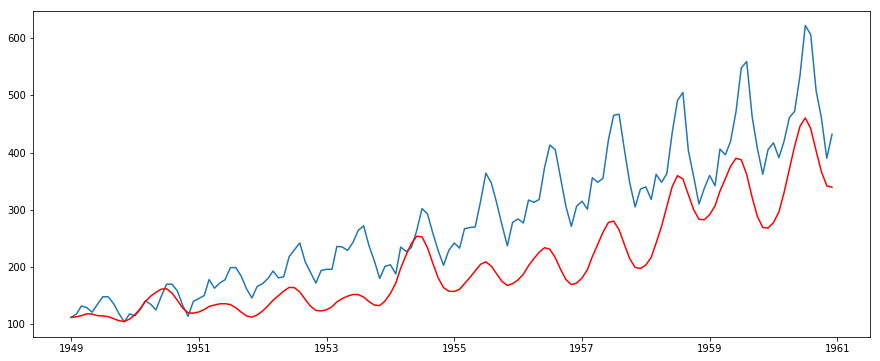

In [91]:
# Last step is to take the exponent and compare with the original series.
predictions_ARIMA =np.exp(pred_arima_log)
plt.plot(ts)
plt.plot(predictions_ARIMA, color='red')
print('rmse: ',np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))